In [ ]:
!pip install -r requirements.txt

## Libraries

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick

sns.set(style="whitegrid")

## Functions

In [2]:
def genre_distribution(df, genre_feat, group_feature, top_genres):
    n_genres = len(top_genres)
    palette = sns.color_palette("tab10", n_colors=n_genres)

    for i, genre in enumerate(top_genres):
        subset = df[df[genre_feat] == genre]
        plt.hist(
            subset[group_feature],
            bins=30,
            alpha=0.5,
            label=genre,
            color=palette[i],
            edgecolor="black",
        )

    plt.xlabel(group_feature, fontsize=8)
    plt.ylabel("Frequency", fontsize=8)
    plt.title(
        f"{group_feature} Histogram for Top {n_genres} Genres",
        fontsize=10,
        weight="bold",
    )
    plt.legend(title="Genre", fontsize=8)
    plt.tight_layout()
    plt.show()

In [13]:
def grid_genre_distribution(df, genre_feat, group_feature, top_genres, n_cols=3):
    n_genres = len(top_genres)
    n_cols = n_cols
    n_rows = (n_genres + n_cols - 1) // n_cols  # ceiling division

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten()  # flatten in case of multiple rows

    palette = sns.color_palette("tab10", n_colors=n_genres)

    for i, genre in enumerate(top_genres):
        subset = df[df[genre_feat] == genre]
        axes[i].hist(
            subset[group_feature],
            bins=30,
            color=palette[i],
            edgecolor="black",
            alpha=0.7,
        )
        axes[i].set_title(genre, fontsize=12, weight="bold")
        axes[i].set_xlabel(group_feature)
        axes[i].set_ylabel("Frequency")

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(
        f"{group_feature} Histograms for Top {n_genres} Genres",
        fontsize=16,
        weight="bold",
        y=1.02,
    )

    plt.tight_layout()
    plt.show()

## Perform Final EDA

In [4]:
df = pd.read_csv("data/cleaned_spotify_tracks.csv")

# I want information per genre
df["genre"] = df["track_genre"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
df_exploded = df.explode("genre").reset_index(drop=True)
print(f'There are {df_exploded["genre"].nunique()} unique genres')
# assert df.shape[0] == df_exploded.shape[0]

df_exploded.head(3)

There are 114 unique genres


,track_id,artists,track_name,track_genre,explicit,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,primary_artist,duration_sec,duration_min,genre
0,0000vdREvCVMxbQTkS888c,['Rill'],Lolly,['german'],1,44,0.910,0.374,8,-9.844,...,0.00301,0.154,0.432,104.042,160725,4,Rill,160.725,2.678750,german
1,000CC8EParg64OmTxVnZ0p,['Glee Cast'],It's All Coming Back To Me Now (Glee Cast Vers...,['club'],0,47,0.269,0.516,0,-7.361,...,0.00000,0.117,0.341,178.174,322933,4,Glee Cast,322.933,5.382217,club
2,000Iz0K615UepwSJ5z2RE5,"['Paul Kalkbrenner', 'Pig&Dan']",Böxig Leise - Pig & Dan Remix,['minimal-techno'],0,22,0.686,0.560,5,-13.264,...,0.18100,0.111,0.108,119.997,515360,4,Paul Kalkbrenner,515.360,8.589333,minimal-techno


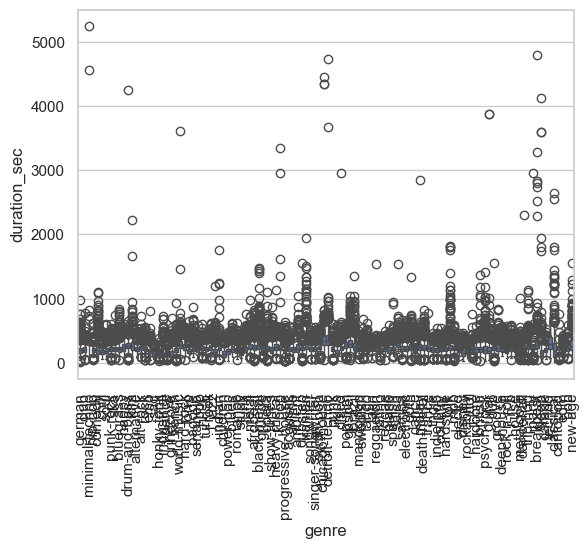

In [5]:
# Overall trend for the duration in second for each genre
sns.boxplot(x="genre", y="duration_sec", data=df_exploded)
plt.xticks(rotation=90)
plt.show()

In [6]:
n_genres = 15
top_genres = df_exploded["genre"].value_counts().head(n_genres).index

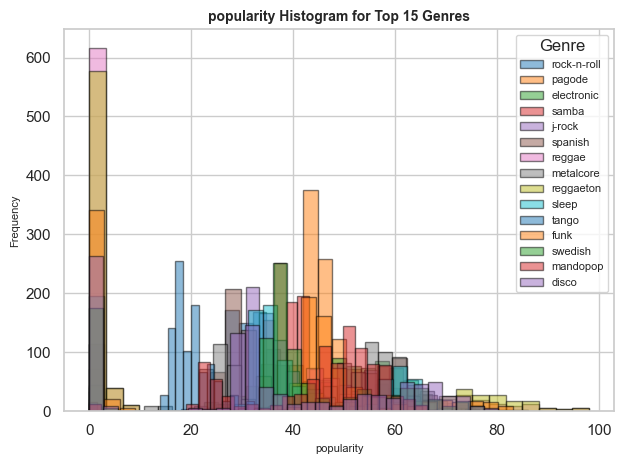

In [ ]:
genre_distribution(
    df=df_exploded,
    genre_feat="genre",
    group_feature="popularity",
    top_genres=top_genres,
)

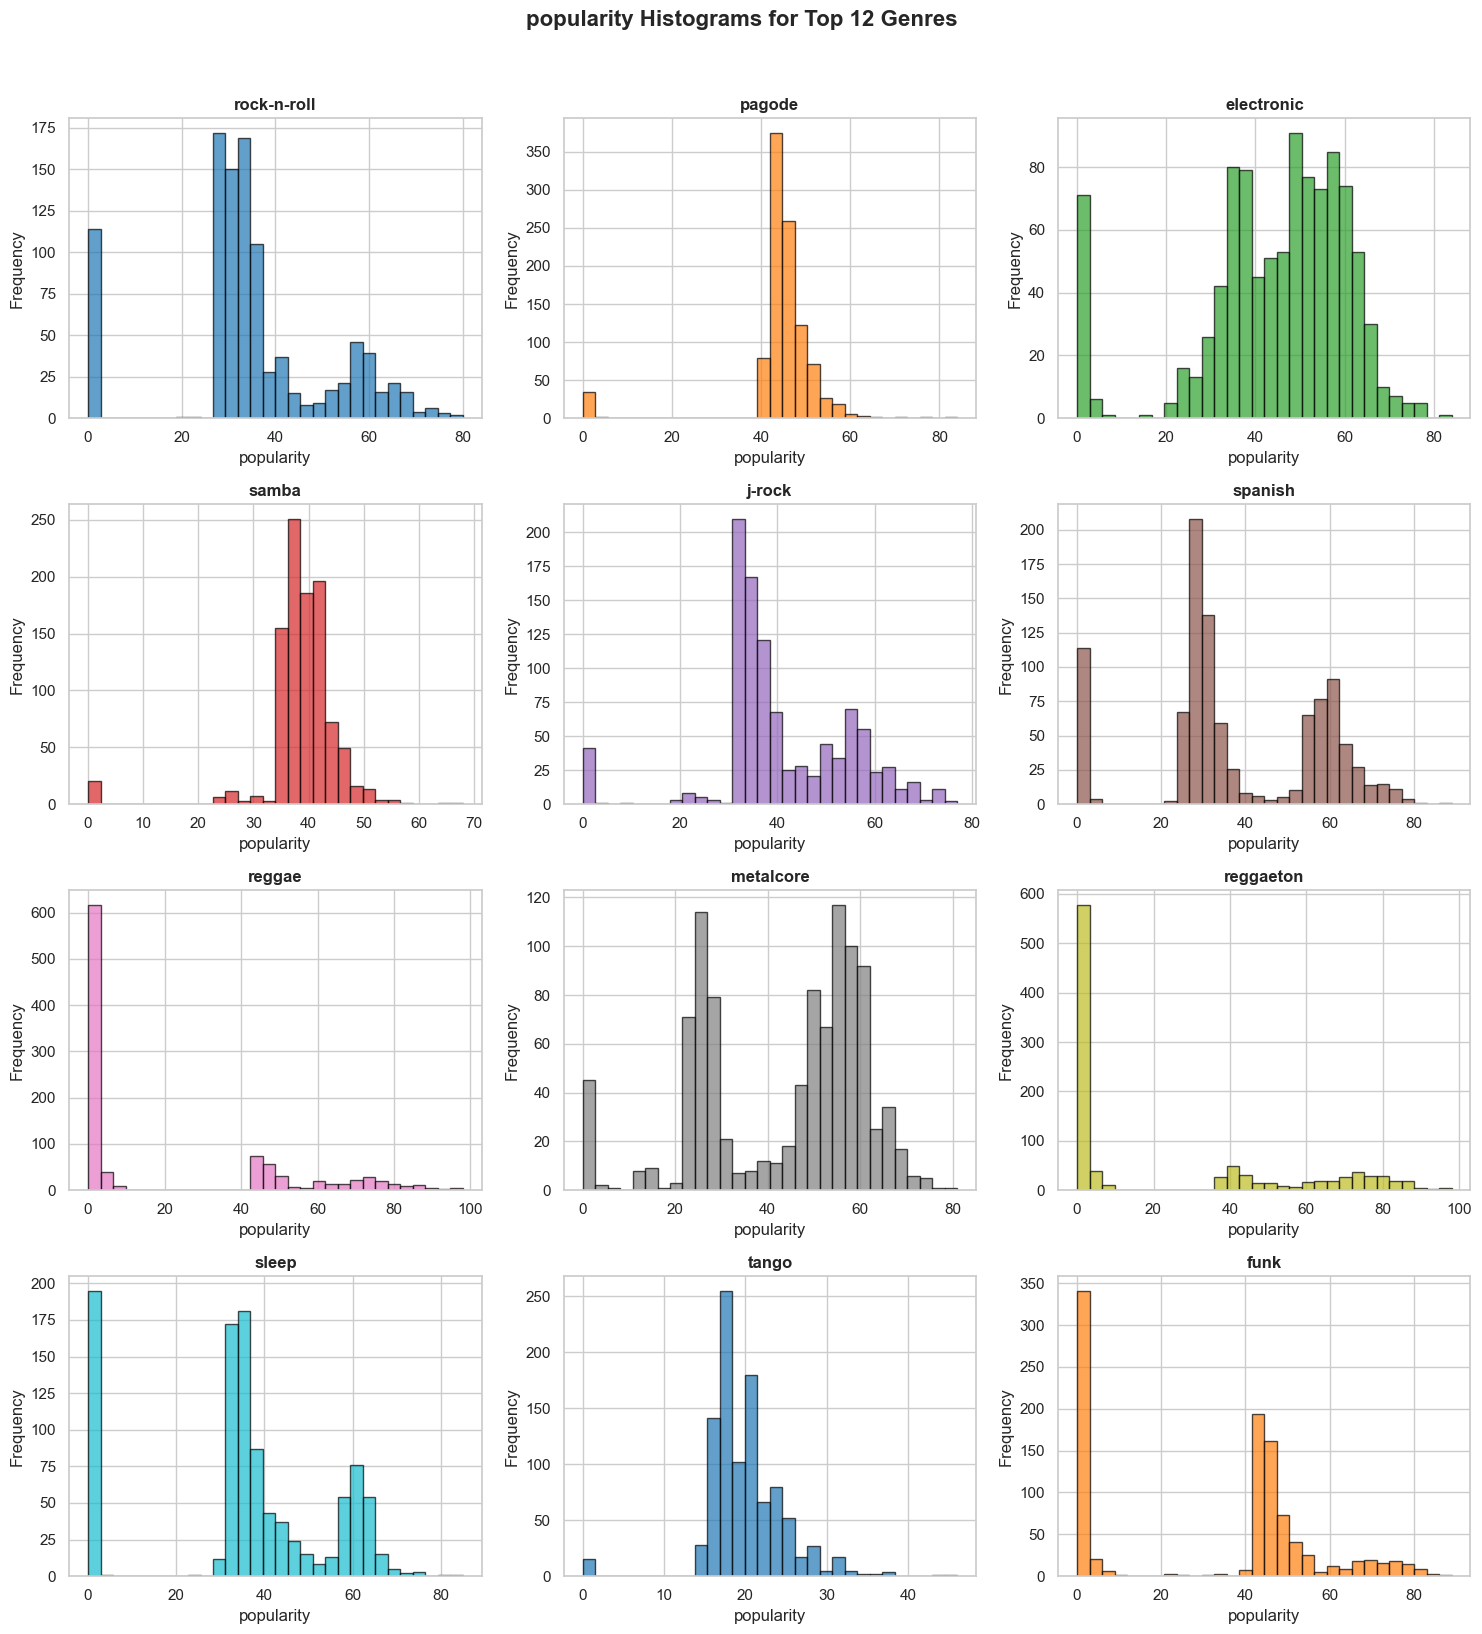

In [16]:
n_genres = 12
top_genres = df_exploded["genre"].value_counts().head(n_genres).index

grid_genre_distribution(
    df=df_exploded,
    genre_feat="genre",
    group_feature="popularity",
    top_genres=top_genres,
    n_cols=3,
)

In [ ]:
key_feats = [
    "track_genre",
    "explicit",
    "popularity",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "time_signature",
    "duration_sec",
]

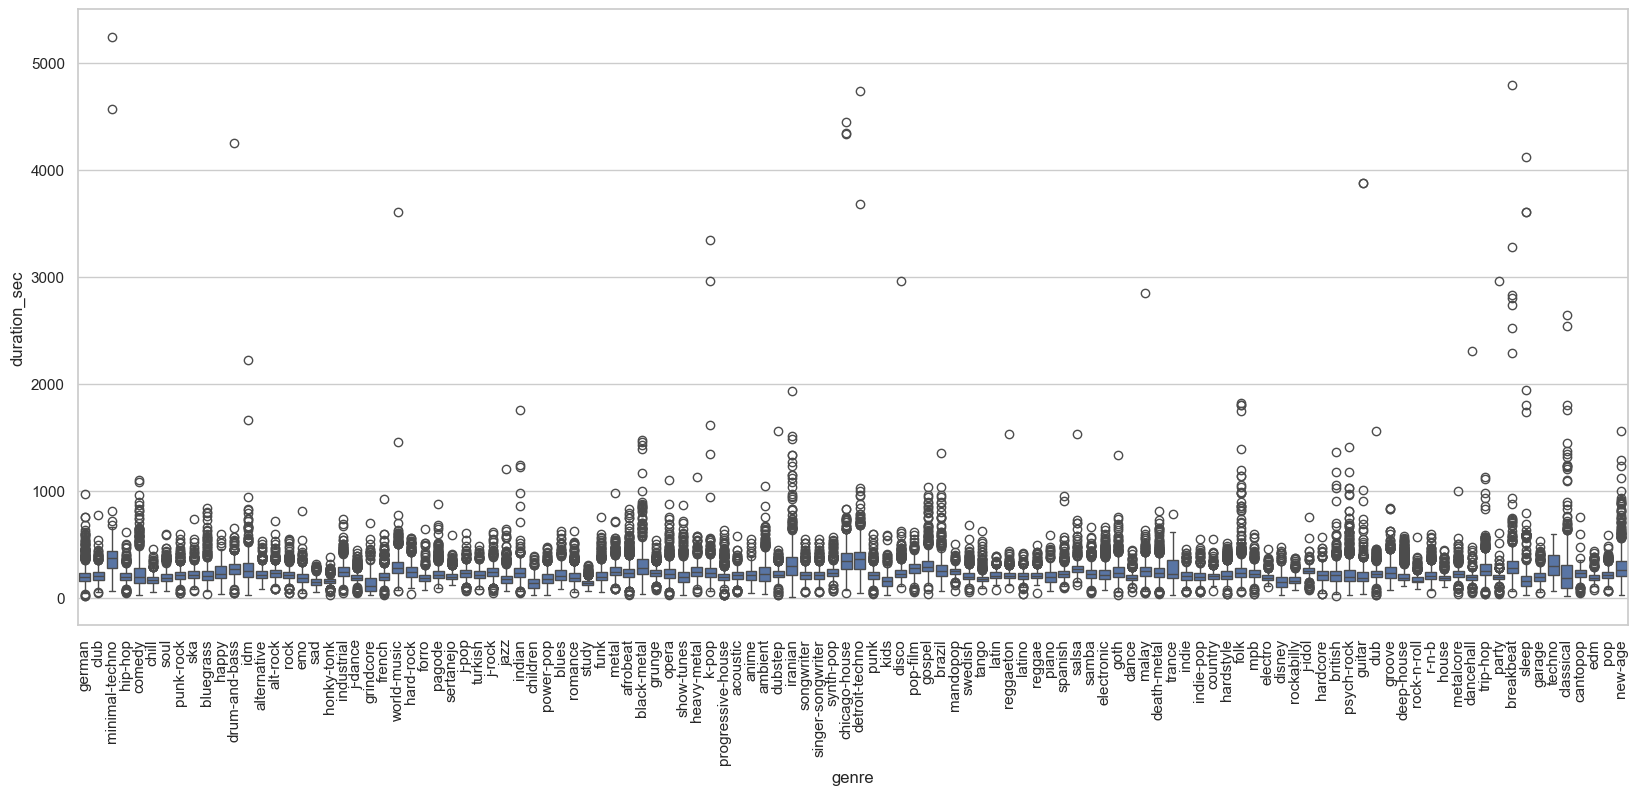

In [9]:
plt.figure(figsize=(20, 8))

# Overall trend for the duration in second for each genre
sns.boxplot(x="genre", y="duration_sec", data=df_exploded)
plt.xticks(rotation=90)
plt.show()